# Reinforcement Learning Final Project 

Welcome to your Reinforcement Learning project! Join in groups of a maximum of 5 students on a project focused on developing an RL agent capable of solving an environment for decision-making in Autonomous Driving. The project deadline has been set to the 2nd of June.

Autonomous Driving has long been considered a field in which RL algorithms excel, and this project aims to leverage the power of RL to create an intelligent agent that can solve the Farama’s foundation “highway-env” project, namely the Highway environment (refer to https://highway-env.farama.org/environments/highway/).

## Project Requirements:

* The environments observation’s format can vary according to our preference, namely Kinematics, Grayscale Image, Occupancy grid and Time to collision (refer to https://highway-env.farama.org/observations/). In your solutions you should use 2 of these types.
* The agents actions can also vary, as continuous actions, discrete actions and discrete meta-actions (refer to https://highway-env.farama.org/actions/). In your solutions you should use 2 of these types.
* As for the algorithms to use, any algorithm is valid (seen or not in class), with a minimum requirement of 3 different algorithms used.
* Apart from the environment observation types and agent action types you must use environment’s configuration provided in the annexed notebook!
Note: Your delivery should comprise 4 solutions to the highway environment (corresponding to the combinations of the two environment observation’s types and the two agent’s action types), in which you just need to use one algorithm for each combination (knowing that you need to use at least 3 different algorithms).


## Project Objectives:

* Train an RL agent to solve the Highway environment: The primary objective of this project is to develop an RL agent that can maximize the reward given by the highway environment (refer to https://highway-env.farama.org/rewards/), which leverages to maximize speed while minimizing crash risk! 
* Optimize decision-making using RL algorithms: Explore different RL algorithms to train the agent. Compare and analyse their effectiveness in learning and decision-making capabilities in the context of the environment.
* Explore and expand on the reward system: Although you should evaluate your agent with the reward function provided by the environment, you could/should expand it to better train your agent.
* Enhance interpretability and analysis: Develop methods to analyse the agent's decision-making process and provide insights into its strategic thinking. Investigate techniques to visualize the agent's evaluation of chess positions and understand its reasoning behind specific moves.



### Extra Objectives:

* Investigate transfer learning and generalization: Explore techniques for transfer learning to leverage knowledge acquired in related domains or from pre-training on large chess datasets. Investigate the agent's ability to generalize its knowledge.
* Explore multi agent approaches: The environment allows you to use more than one agent per episode. Explore multi agent alternatives to improve your learning times and overall benchmarks.


## Group members

Student Name - Alícia Pinho Santos <br>
Student id - 20230525 <br>
Contact e-mail - 20230525@novaims.unl.pt <br>

Student Name - Filipe Alexandre Cleto dos Santos de Sousa Rodrigues <br>
Student id - 20201866 <br>
Contact e-mail - 20201866@novaims.unl.pt <br>

Student Name - Gonçalo Lagos Ferreia <br>
Student id - 20230492 <br>
Contact e-mail - 20230492@novaims.unl.pt <br>

Student Name - Inês Dinis Castelhano <br>
Student id - 20230478 <br>
Contact e-mail - 20230478@novaims.unl.pt <br>

## Imports Required

You might need to restart the kernel after installation

In [10]:
#! pip install highway-env 

In [6]:
import gymnasium as gym
import time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pprint import pprint

import pandas as pd
from collections import defaultdict

from tqdm.notebook import tqdm

from stable_baselines3 import DQN
from stable_baselines3 import TD3
from stable_baselines3 import PPO
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.torch_layers import BaseFeaturesExtractor
from stable_baselines3.common.vec_env import SubprocVecEnv

from tqdm.notebook import trange  

from highway_env.utils import lmap

import functools

import pygame
import torch
import torch as th
import torch.nn as nn

from torch.distributions import Categorical
from torch.nn import functional as F


## Environment Configuration

Apart from the environment observation types and agent action types you must use some of the environment’s configurations provided bellow!

In [3]:
configuration = {

    # Parametrization bellow cannot be changed
    "lanes_count": 10, # The environment must always have 10 lanes
    "vehicles_count": 50, # The environment must always have 50 other vehicles
    "duration": 120,  # [s] The environment must terminate never before 120 seconds
    "other_vehicles_type": "highway_env.vehicle.behavior.IDMVehicle", # This is the policy of the other vehicles
    "initial_spacing": 2, # Initial spacing between vehicles needs to be at most 2

    # Refer to refer to https://highway-env.farama.org/observations/ to change observation space type
    "observation": {
        "type": "Kinematics"
    },

    # Refer to refer to https://highway-env.farama.org/actions/ to change action space type
    "action": {
        "type": "DiscreteMetaAction",
    },

    # Parameterization bellow can be changed (as it refers mostly to the reward system)
    "collision_reward": -1000,  # The reward received when colliding with a vehicle. (Can be changed)
    "right_lane_reward": 0.1,  # The reward received when driving on the right-most lanes, linearly mapped to # zero for other lanes.
    "high_speed_reward": 5,  # The reward received when driving at full speed, linearly mapped to zero for# lower speeds according to config["reward_speed_range"].
    "lane_change_reward": 0,  # The reward received at each lane change action.
    "reward_speed_range": [20, 30],  # [m/s] The reward for high speed is mapped linearly from this range to [0, HighwayEnv.HIGH_SPEED_REWARD]. (Can be changed)
    "simulation_frequency": 15,  # [Hz] (Can be changed)
    "policy_frequency": 1,  # [Hz] (Can be changed)
    
    # Parameters defined bellow are purely for visualiztion purposes! You can alter them as you please
    "screen_width": 800,  # [px]
    "screen_height": 600,  # [px]
    "centering_position": [0.5, 0.5],
    "scaling": 5,
    "show_trajectories": False,
    "render_agent": True,
    "offscreen_rendering": False
}

## Example Solution
### Solution 0
Environment Observation Type: **Kinematics** \
Agent Action Type: **DiscreteMetaAction** \
Algorithm Used: **Random**

Example of the environment's usage using a random policy.

In [4]:
env = env = gym.make('highway-v0', render_mode='human', config=configuration)

obs, info = env.reset(seed=42)
done = truncated = False

Return = 0
n_steps = 1
Episode = 0
while not (done or truncated):
  # Dispatch the observations to the model to get the tuple of actions
  action = env.action_space.sample()
  # Execute the actions
  next_obs, reward, done, truncated, info = env.step(action)
  Return+=reward

  print('Episode: {}, Step: {}, Return: {}'.format(Episode, n_steps, round(Return,2)))
  n_steps+=1
env.close()

Episode: 0, Step: 1, Return: 1.0
Episode: 0, Step: 2, Return: 1.99
Episode: 0, Step: 3, Return: 2.99
Episode: 0, Step: 4, Return: 3.98
Episode: 0, Step: 5, Return: 4.98
Episode: 0, Step: 6, Return: 5.98
Episode: 0, Step: 7, Return: 6.98
Episode: 0, Step: 8, Return: 7.98
Episode: 0, Step: 9, Return: 8.97
Episode: 0, Step: 10, Return: 9.97
Episode: 0, Step: 11, Return: 10.96
Episode: 0, Step: 12, Return: 11.96
Episode: 0, Step: 13, Return: 12.96
Episode: 0, Step: 14, Return: 13.95
Episode: 0, Step: 15, Return: 14.95
Episode: 0, Step: 16, Return: 15.95
Episode: 0, Step: 17, Return: 16.95
Episode: 0, Step: 18, Return: 17.94
Episode: 0, Step: 19, Return: 18.94
Episode: 0, Step: 20, Return: 19.94
Episode: 0, Step: 21, Return: 20.93
Episode: 0, Step: 22, Return: 21.93
Episode: 0, Step: 23, Return: 22.92
Episode: 0, Step: 24, Return: 23.92
Episode: 0, Step: 25, Return: 24.91
Episode: 0, Step: 26, Return: 25.91
Episode: 0, Step: 27, Return: 26.9
Episode: 0, Step: 28, Return: 27.9
Episode: 0, St

## Solution 1
Environment Observation Type: Kinematics \
Agent Action Type: DiscreteMetaAction \
Algorithm Used: SARSA (State-Action-Reward-State-Action)

In [8]:
SARSA_configuration = {
    "lanes_count": 4,
    "vehicles_count": 50,
    "duration": 40,
    "other_vehicles_type": "highway_env.vehicle.behavior.IDMVehicle",
    "initial_spacing": 2,
    "observation": {
        "type": "Kinematics",
        "features": ["x", "y", "vx", "vy"],
    },
    "action": {"type": "DiscreteMetaAction"},
    "collision_reward": -10,
    "reward_speed_range": [20, 30],
    "simulation_frequency": 15,
    "policy_frequency": 1,
    "screen_width": 800,
    "screen_height": 600,
    "centering_position": [0.5, 0.5],
    "scaling": 5,
    "show_trajectories": True,
    "render_agent": True,
    "offscreen_rendering": False,
}

env = gym.make('highway-v0', config=SARSA_configuration, render_mode='human')

In [9]:
def discretize_observation(observation, bins):
    discretized = []
    for vehicle in observation:
        for i, feature in enumerate(vehicle):
            discretized.append(np.digitize(feature, bins[i]) - 1)
    return tuple(discretized)

def create_bins(num_bins, obs_low, obs_high):
    bins = []
    for low, high in zip(obs_low.flatten(), obs_high.flatten()):
        bins.append(np.linspace(low, high, num_bins + 1)[1:-1])
    return bins

In [10]:
# Function to choose an action based on the epsilon-greedy policy
def choose_action(q_table, state, action_space, epsilon):
    if np.random.rand() < epsilon:
        return action_space.sample()
    else:
        return np.argmax(q_table[state])

# Function to update the Q-value
def update_q_value(q_table, state, action, reward, next_state, next_action, alpha, gamma, done):
    td_target = reward + gamma * q_table[next_state][next_action] * (1 - done)
    td_delta = td_target - q_table[state][action]
    q_table[state][action] += alpha * td_delta

# Function to execute one step in the environment
def step(env, state, action, bins, q_table, action_space, alpha, gamma, epsilon):
    next_obs, reward, done, truncated, _ = env.step(action)
    next_state = discretize_observation(next_obs, bins)
    next_action = choose_action(q_table, next_state, action_space, epsilon)
    update_q_value(q_table, state, action, reward, next_state, next_action, alpha, gamma, done or truncated)
    return next_state, next_action, reward, done or truncated


In [11]:
# Function to train the agent
def train_agent(env, num_iterations=1000, alpha=0.1, gamma=0.9, max_steps_per_episode=200, num_bins=10):
    observation_space = env.observation_space
    action_space = env.action_space
    bins = create_bins(num_bins, observation_space.low, observation_space.high)
    q_table = defaultdict(lambda: np.zeros(action_space.n))
    returns = []
    epsilon = 0.8
    epsilon_decay = epsilon / num_iterations

    for i in tqdm(range(num_iterations)):
        obs, _ = env.reset(seed=np.random.randint(100))
        state = discretize_observation(obs, bins)
        action = choose_action(q_table, state, action_space, epsilon)
        total_reward = 0
        done = False
        steps = 0

        while not done and steps < max_steps_per_episode:
            state, action, reward, done = step(env, state, action, bins, q_table, action_space, alpha, gamma, epsilon)
            total_reward += reward
            steps += 1

        returns.append(total_reward)
        epsilon -= epsilon_decay

    return returns, q_table

In [12]:
# Function to visualize the agent's performance
def visualize_agent(env, q_table, bins, max_steps_per_episode=200):
    epsilon = 0
    obs, _ = env.reset(seed=np.random.randint(100))
    state = discretize_observation(obs, bins)
    total_reward = 0
    done = False
    steps = 0

    while not done and steps < max_steps_per_episode:
        env.render()
        action = choose_action(q_table, state, env.action_space, epsilon)
        next_obs, reward, done, truncated, _ = env.step(action)
        state = discretize_observation(next_obs, bins)
        total_reward += reward
        done = done or truncated
        steps += 1

    env.close()
    return total_reward

In [13]:
def test_agent(env, q_table, bins, num_episodes=100, max_steps_per_episode=200):
    total_rewards = []
    episode_lengths = []
    epsilon = 0
    start_time = time.time()

    for episode in range(num_episodes):
        obs, _ = env.reset(seed=np.random.randint(100))
        state = discretize_observation(obs, bins)
        total_reward = 0
        done = False
        steps = 0

        while not done and steps < max_steps_per_episode:
            action = choose_action(q_table, state, env.action_space, epsilon)
            next_obs, reward, done, truncated, _ = env.step(action)
            state = discretize_observation(next_obs, bins)
            total_reward += reward
            done = done or truncated
            steps += 1

        total_rewards.append(total_reward)
        episode_lengths.append(steps)

    end_time = time.time()
    evaluation_time = end_time - start_time
    mean_reward = np.mean(total_rewards)
    mean_length = np.mean(episode_lengths)

    plt.plot(total_rewards)
    plt.xlabel('Episode')
    plt.ylabel('Total Reward')
    plt.title('SARSA Testing Rewards')
    plt.axhline(y=mean_reward, color='r', linestyle='--', label=f'Mean Reward: {mean_reward:.2f}')
    plt.legend()
    plt.show()

    print(f'Average Total Reward during Testing (SARSA): {mean_reward:.2f}')
    print(f'Average Episode Length during Testing (SARSA): {mean_length:.2f}')
    print(f'Evaluation Time (SARSA): {evaluation_time:.2f} seconds')

    return total_rewards, mean_reward, mean_length, evaluation_time

c:\Users\inesd\anaconda3\envs\ml\lib\site-packages\numpy\core\function_base.py:158: RuntimeWarning: invalid value encountered in multiply
  y *= step
c:\Users\inesd\anaconda3\envs\ml\lib\site-packages\numpy\core\function_base.py:168: RuntimeWarning: invalid value encountered in add
  y += start


  0%|          | 0/500 [00:00<?, ?it/s]

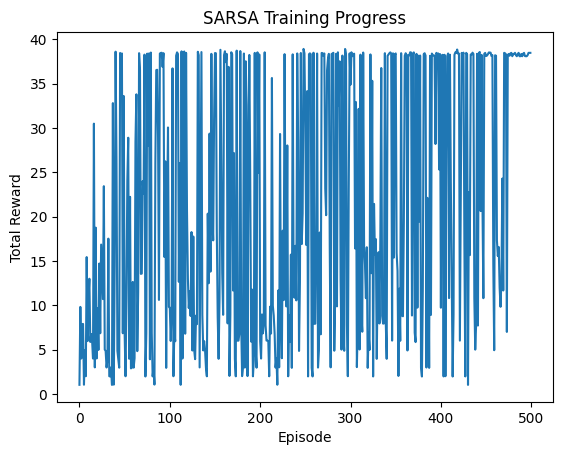

In [14]:
# Training
returns, q_table = train_agent(env, num_iterations=500, alpha=0.1, gamma=0.9, max_steps_per_episode=200)

# Plotting the training progress
plt.plot(returns)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('SARSA Training Progress')
plt.show()

In [15]:
total_reward = visualize_agent(env, q_table, create_bins(10, env.observation_space.low, env.observation_space.high), max_steps_per_episode=200)
print(f'Total Reward during Visualization (SARSA): {total_reward}')

c:\Users\inesd\anaconda3\envs\ml\lib\site-packages\numpy\core\function_base.py:158: RuntimeWarning: invalid value encountered in multiply
  y *= step
c:\Users\inesd\anaconda3\envs\ml\lib\site-packages\numpy\core\function_base.py:168: RuntimeWarning: invalid value encountered in add
  y += start


Total Reward during Visualization (SARSA): 38.099164000199046


c:\Users\inesd\anaconda3\envs\ml\lib\site-packages\numpy\core\function_base.py:158: RuntimeWarning: invalid value encountered in multiply
  y *= step
c:\Users\inesd\anaconda3\envs\ml\lib\site-packages\numpy\core\function_base.py:168: RuntimeWarning: invalid value encountered in add
  y += start


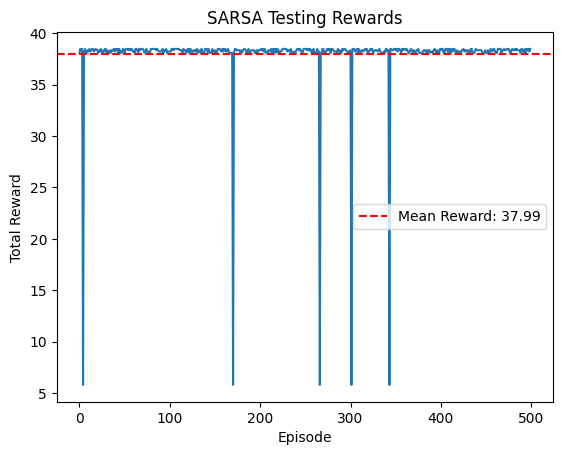

Average Total Reward during Testing (SARSA): 37.99
Average Episode Length during Testing (SARSA): 39.67
Evaluation Time (SARSA): 8961.59 seconds


In [16]:
# Testing
test_rewards, mean_reward, mean_length, evaluation_time = test_agent(env, q_table, bins=create_bins(10, env.observation_space.low, env.observation_space.high), num_episodes=500)

In [17]:
env.close()

## Solution 2
Environment Observation Type: Kinematics \
Agent Action Type: DiscreteMetaAction \
Algorithm Used: PPO (Proximal Policy Optimization)

In [20]:
def activation_factory(activation_type):
    activations = {
        "RELU": F.relu,
        "TANH": torch.tanh,
        "ELU": nn.ELU()
    }
    if activation_type not in activations:
        raise ValueError(f"Unknown activation_type: {activation_type}")
    return activations[activation_type]

In [21]:
def init_weights(m, reset_type):
    if hasattr(m, "weight"):
        if reset_type == "XAVIER":
            torch.nn.init.xavier_uniform_(m.weight.data)
        elif reset_type == "ZEROS":
            torch.nn.init.constant_(m.weight.data, 0.0)
        else:
            raise ValueError(f"Unknown reset type: {reset_type}")
    if hasattr(m, "bias") and m.bias is not None:
        torch.nn.init.constant_(m.bias.data, 0.0)

In [22]:
class BaseModule(torch.nn.Module):
    def __init__(self, activation_type="RELU", reset_type="XAVIER"):
        super().__init__()
        self.activation = activation_factory(activation_type)
        self.reset_type = reset_type

    def reset(self):
        self.apply(lambda m: init_weights(m, self.reset_type))

In [23]:
class MultiLayerPerceptron(BaseModule):
    def __init__(self, in_size=None, layer_sizes=None, reshape=True, out_size=None, activation="RELU", is_policy=False, **kwargs):
        super().__init__(**kwargs)
        self.reshape = reshape
        self.layer_sizes = layer_sizes or [64, 64]
        self.out_size = out_size
        self.activation = activation_factory(activation)
        self.is_policy = is_policy
        self.softmax = nn.Softmax(dim=-1)
        sizes = [in_size] + self.layer_sizes
        self.layers = nn.ModuleList([nn.Linear(sizes[i], sizes[i + 1]) for i in range(len(sizes) - 1)])
        if out_size:
            self.predict = nn.Linear(sizes[-1], out_size)

    def forward(self, x):
        if self.reshape:
            x = x.reshape(x.shape[0], -1)
        for layer in self.layers:
            x = self.activation(layer(x.float()))
        if self.out_size:
            x = self.predict(x)
        if self.is_policy:
            action_probs = self.softmax(x)
            dist = Categorical(action_probs)
            return dist
        return x


In [24]:
class EgoAttention(BaseModule):
    def __init__(self, feature_size=64, heads=4, dropout_factor=0):
        super().__init__()
        self.feature_size = feature_size
        self.heads = heads
        self.dropout_factor = dropout_factor
        self.features_per_head = self.feature_size // self.heads
        self.value_all = nn.Linear(self.feature_size, self.feature_size, bias=False)
        self.key_all = nn.Linear(self.feature_size, self.feature_size, bias=False)
        self.query_ego = nn.Linear(self.feature_size, self.feature_size, bias=False)
        self.attention_combine = nn.Linear(self.feature_size, self.feature_size, bias=False)

    def forward(self, ego, others, mask=None):
        batch_size = others.shape[0]
        n_entities = others.shape[1] + 1
        input_all = torch.cat((ego.view(batch_size, 1, self.feature_size), others), dim=1)
        key_all = self.key_all(input_all).view(batch_size, n_entities, self.heads, self.features_per_head)
        value_all = self.value_all(input_all).view(batch_size, n_entities, self.heads, self.features_per_head)
        query_ego = self.query_ego(ego).view(batch_size, 1, self.heads, self.features_per_head)
        key_all = key_all.permute(0, 2, 1, 3)
        value_all = value_all.permute(0, 2, 1, 3)
        query_ego = query_ego.permute(0, 2, 1, 3)
        if mask is not None:
            mask = mask.view((batch_size, 1, 1, n_entities)).repeat((1, self.heads, 1, 1))
        value, attention_matrix = attention(query_ego, key_all, value_all, mask, nn.Dropout(self.dropout_factor))
        result = (self.attention_combine(value.reshape((batch_size, self.feature_size))) + ego.squeeze(1)) / 2
        return result, attention_matrix

In [25]:
class EgoAttentionNetwork(BaseModule):
    def __init__(self, in_size=None, out_size=None, presence_feature_idx=0, embedding_layer_kwargs=None, attention_layer_kwargs=None, **kwargs):
        super().__init__(**kwargs)
        self.out_size = out_size
        self.presence_feature_idx = presence_feature_idx
        embedding_layer_kwargs = embedding_layer_kwargs or {}
        if not embedding_layer_kwargs.get("in_size"):
            embedding_layer_kwargs["in_size"] = in_size
        self.ego_embedding = MultiLayerPerceptron(**embedding_layer_kwargs)
        self.embedding = MultiLayerPerceptron(**embedding_layer_kwargs)
        attention_layer_kwargs = attention_layer_kwargs or {}
        self.attention_layer = EgoAttention(**attention_layer_kwargs)

    def forward(self, x):
        ego_embedded_att, _ = self.forward_attention(x)
        return ego_embedded_att

    def split_input(self, x, mask=None):
        if len(x.shape) == 2:
            x = x.unsqueeze(axis=0)
        ego = x[:, 0:1, :]
        others = x[:, 1:, :]
        if mask is None:
            aux = self.presence_feature_idx
            mask = x[:, :, aux : aux + 1] < 0.5
        return ego, others, mask

    def forward_attention(self, x):
        ego, others, mask = self.split_input(x)
        ego = self.ego_embedding(ego)
        others = self.embedding(others)
        return self.attention_layer(ego, others, mask)

    def get_attention_matrix(self, x):
        _, attention_matrix = self.forward_attention(x)
        return attention_matrix

In [26]:
def attention(query, key, value, mask=None, dropout=None):
    d_k = query.size(-1)
    scores = torch.matmul(query, key.transpose(-2, -1)) / np.sqrt(d_k)
    if mask is not None:
        scores = scores.masked_fill(mask, -1e9)
    p_attn = F.softmax(scores, dim=-1)
    if dropout is not None:
        p_attn = dropout(p_attn)
    output = torch.matmul(p_attn, value)
    return output, p_attn

In [27]:
attention_network_kwargs = {
    "in_size": 5 * 15,
    "embedding_layer_kwargs": {"in_size": 7, "layer_sizes": [64, 64], "reshape": False},
    "attention_layer_kwargs": {"feature_size": 64, "heads": 2},
}

In [28]:
class CustomExtractor(BaseFeaturesExtractor):
    def __init__(self, observation_space: gym.spaces.Box, **kwargs):
        super().__init__(observation_space, features_dim=kwargs["attention_layer_kwargs"]["feature_size"])
        self.extractor = EgoAttentionNetwork(**kwargs)

    def forward(self, observations: torch.Tensor) -> torch.Tensor:
        return self.extractor(observations)

In [29]:
def make_configure_env(**kwargs):
    env = gym.make(kwargs["id"])
    env.configure(kwargs["config"])
    env.reset()
    return env

env_kwargs = {
    "id": "highway-v0",
    "config": {
        "lanes_count": 4,
        "vehicles_count": 50,
        "observation": {
            "type": "Kinematics",
            "vehicles_count": 10,
            "features": ["presence", "x", "y", "vx", "vy", "cos_h", "sin_h"],
            "absolute": False,
        },
        "action": {"type": "DiscreteMetaAction"},
        "policy_frequency": 2,
        "duration": 40,
    },
}

In [30]:
def display_vehicles_attention(agent_surface, sim_surface, env, model, min_attention=0.01):
    v_attention = compute_vehicles_attention(env, model)
    for head in range(list(v_attention.values())[0].shape[0]):
        attention_surface = pygame.Surface(sim_surface.get_size(), pygame.SRCALPHA)
        for vehicle, attention in v_attention.items():
            if attention[head] < min_attention:
                continue
            width = attention[head] * 5
            desat = np.clip(lmap(attention[head], (0, 0.5), (0.7, 1)), 0.7, 1)
            colors = sns.color_palette("dark", desat=desat)
            color = np.array(colors[(2 * head) % (len(colors) - 1)]) * 255
            color = (*color, np.clip(lmap(attention[head], (0, 0.5), (100, 200)), 100, 200))
            if vehicle is env.vehicle:
                pygame.draw.circle(attention_surface, color, sim_surface.vec2pix(env.vehicle.position), max(sim_surface.pix(width / 2), 1))
            else:
                pygame.draw.line(attention_surface, color, sim_surface.vec2pix(env.vehicle.position), sim_surface.vec2pix(vehicle.position), max(sim_surface.pix(width), 1))
        sim_surface.blit(attention_surface, (0, 0))

In [31]:
def compute_vehicles_attention(env, model):
    obs = env.unwrapped.observation_type.observe()
    obs_t = torch.tensor(obs[None, ...], dtype=torch.float)
    attention = model.policy.features_extractor.extractor.get_attention_matrix(obs_t)
    attention = attention.squeeze(0).squeeze(1).detach().cpu().numpy()
    ego, others, mask = model.policy.features_extractor.extractor.split_input(obs_t)
    mask = mask.squeeze()
    v_attention = {}
    obs_type = env.observation_type
    if hasattr(obs_type, "agents_observation_types"):  # Handle multi-agent observation
        obs_type = obs_type.agents_observation_types[0]
    for v_index in range(obs.shape[0]):
        if mask[v_index]:
            continue
        v_position = {}
        for feature in ["x", "y"]:
            v_feature = obs[v_index, obs_type.features.index(feature)]
            v_feature = lmap(v_feature, [-1, 1], obs_type.features_range[feature])
            v_position[feature] = v_feature
        v_position = np.array([v_position["x"], v_position["y"]])
        if not obs_type.absolute and v_index > 0:
            v_position += env.unwrapped.vehicle.position
        vehicle = min(env.unwrapped.road.vehicles, key=lambda v: np.linalg.norm(v.position - v_position))
        v_attention[vehicle] = attention[:, v_index]
    return v_attention

In [32]:
if __name__ == "__main__":
    train = True
    if train:
        n_cpu = 4
        policy_kwargs = {
            "features_extractor_class": CustomExtractor,
            "features_extractor_kwargs": attention_network_kwargs,
        }
        env = make_vec_env(make_configure_env, n_envs=n_cpu, seed=0, vec_env_cls=SubprocVecEnv, env_kwargs=env_kwargs)
        model = PPO(
            "MlpPolicy",
            env,
            n_steps=512 // n_cpu,
            batch_size=64,
            learning_rate=2e-3,
            policy_kwargs=policy_kwargs,
            verbose=2,
            tensorboard_log="highway_attention_ppo/",
        )
        model.learn(total_timesteps=200 * 1000)
        model.save("highway_attention_ppo/model")

        print('Done Learning!')


Using cpu device
Logging to highway_attention_ppo/PPO_8
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 19.1     |
|    ep_rew_mean     | 15.3     |
| time/              |          |
|    fps             | 12       |
|    iterations      | 1        |
|    time_elapsed    | 39       |
|    total_timesteps | 512      |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 18.7        |
|    ep_rew_mean          | 14.7        |
| time/                   |             |
|    fps                  | 11          |
|    iterations           | 2           |
|    time_elapsed         | 86          |
|    total_timesteps      | 1024        |
| train/                  |             |
|    approx_kl            | 0.009549927 |
|    clip_fraction        | 0.118       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.6        |
|    explained_v

c:\Users\inesd\anaconda3\envs\ml\lib\site-packages\gymnasium\core.py:311: UserWarning: WARN: env.configure to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.configure` for environment variables or `env.get_wrapper_attr('configure')` that will search the reminding wrappers.
  logger.warn(


Mean Reward: 55.47970802310113
Mean Length: 79.302
Total Evaluation Time: 15454.14529132843 seconds


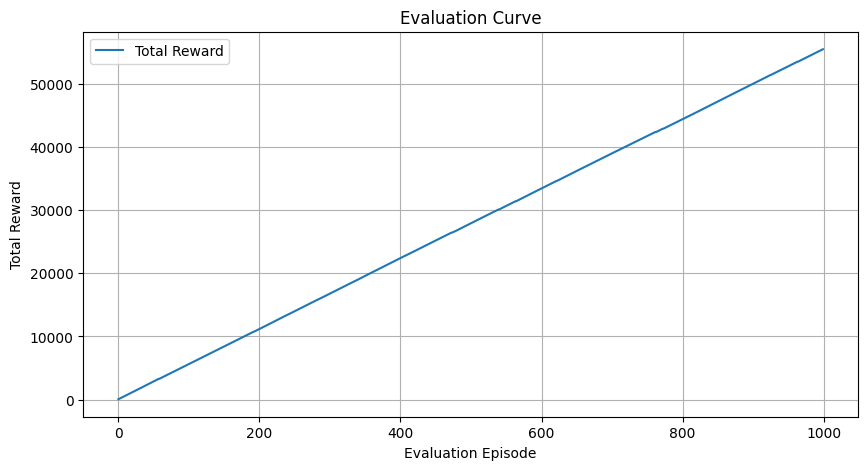

In [33]:
# Load the trained model
model = PPO.load("highway_attention_ppo/model")
env = make_configure_env(**env_kwargs)

# Reset environment for evaluation
obs, info = env.reset()
episode_rewards = []
episode_lengths = []
total_rewards = []

num_eval_episodes = 1000
max_steps_per_episode = 100

start_time = time.time()

# Perform evaluation episodes
for episode in range(num_eval_episodes):
    episode_reward = 0.0
    episode_length = 0

    while episode_length < max_steps_per_episode:
        action, _ = model.predict(obs, deterministic=True)
        obs, reward, done, truncated, info = env.step(action)
        episode_reward += reward
        episode_length += 1
        if done or truncated:
            break

    episode_rewards.append(episode_reward)
    episode_lengths.append(episode_length)
    total_rewards.append(sum(episode_rewards))
    obs, info = env.reset()

# Compute evaluation metrics
mean_reward = np.mean(episode_rewards)
mean_length = np.mean(episode_lengths)

end_time = time.time()
total_time = end_time - start_time

# Print evaluation metrics and time taken
print(f"Mean Reward: {mean_reward}")
print(f"Mean Length: {mean_length}")
print(f"Total Evaluation Time: {total_time} seconds")

# Plot learning curve
plt.figure(figsize=(10, 5))
plt.plot(range(len(total_rewards)), total_rewards, label='Total Reward')
plt.xlabel('Evaluation Episode')
plt.ylabel('Total Reward')
plt.title('Evaluation Curve')
plt.legend()
plt.grid(True)
plt.show()


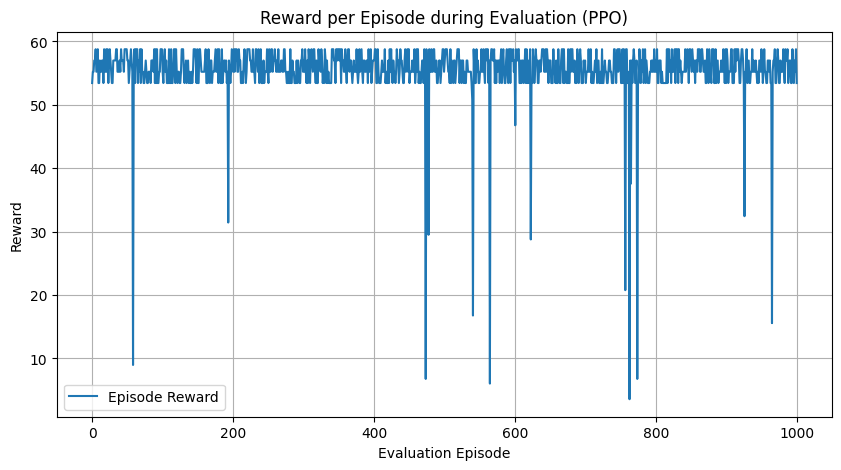

In [35]:
# Plot rewards per episode
plt.figure(figsize=(10, 5))
plt.plot(range(len(episode_rewards)), episode_rewards, label='Episode Reward')
plt.xlabel('Evaluation Episode')
plt.ylabel('Reward')
plt.title('Reward per Episode during Evaluation (PPO)')
plt.legend()
plt.grid(True)
plt.show()

## Solution 3
Environment Observation Type: Kinematics \
Agent Action Type: Discrete Action \
Algorithm Used: DQN (Deep Q-Network)

In [20]:
# Define environment configuration
config = {
    "lanes_count": 4,  # Don't change
    "vehicles_count": 50,  # Don't change
    "duration": 40,  # Don't change
    "other_vehicles_type": "highway_env.vehicle.behavior.IDMVehicle",  # Don't change
    "initial_spacing": 2,  # Don't change
    "observation": {"type": "Kinematics"},
    "action": {"type": "DiscreteAction"},
    "collision_reward": -1,
    "reward_speed_range": [20, 30],
    "simulation_frequency": 15,
    "policy_frequency": 1,
    "screen_width": 800,
    "screen_height": 600,
    "centering_position": [0.5, 0.5],
    "scaling": 5,
    "show_trajectories": False,
    "render_agent": True,
    "offscreen_rendering": False
}

# Modify environment settings as needed
config["lanes_count"] = 4  # Don't change
config["vehicles_count"] = 50  # Don't change
config["duration"] = 40  # Don't change
config["other_vehicles_type"] = "highway_env.vehicle.behavior.IDMVehicle"  # Don't change
config["initial_spacing"] = 2  # Don't change
config["observation"]["type"] = "Kinematics"
config["action"]["type"] = "DiscreteMetaAction"
config["collision_reward"] = -1
config["reward_speed_range"] = [20, 30]
config["simulation_frequency"] = 15
config["policy_frequency"] = 1
config["screen_width"] = 800  # Change as needed
config["screen_height"] = 600  # Change as needed
config["centering_position"] = [0.5, 0.5]  # Change as needed
config["scaling"] = 5  # Change as needed
config["show_trajectories"] = False  # Change as needed
config["render_agent"] = True  # Change as needed
config["offscreen_rendering"] = False  # Change as needed

env = gym.make("highway-v0", config=config, render_mode="human")

model = DQN("MlpPolicy", env, verbose=1)
model.learn(total_timesteps=5000, log_interval=4, progress_bar=True)
model.save("dqn_highway")

print('Done Learning!')

Output()

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.8     |
|    ep_rew_mean      | 8.48     |
|    exploration_rate | 0.918    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 1        |
|    time_elapsed     | 23       |
|    total_timesteps  | 43       |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.12     |
|    ep_rew_mean      | 6.95     |
|    exploration_rate | 0.861    |
| time/               |          |
|    episodes         | 8        |
|    fps              | 1        |
|    time_elapsed     | 41       |
|    total_timesteps  | 73       |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.6     |
|    ep_rew_mean      | 7.9      |
|    exploration_rate | 0.759    |
| time/               |          |
|    episodes         | 12       |
|    fps              | 1        |
|    time_elapsed     | 70       |
|    total_timesteps  | 127      |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.434    |
|    n_updates        | 6        |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.6     |
|    ep_rew_mean      | 13.2     |
|    exploration_rate | 0.464    |
| time/               |          |
|    episodes         | 16       |
|    fps              | 1        |
|    time_elapsed     | 156      |
|    total_timesteps  | 282      |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.371    |
|    n_updates        | 45       |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 20.6     |
|    ep_rew_mean      | 15.2     |
|    exploration_rate | 0.219    |
| time/               |          |
|    episodes         | 20       |
|    fps              | 1        |
|    time_elapsed     | 227      |
|    total_timesteps  | 411      |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.276    |
|    n_updates        | 77       |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 23.8     |
|    ep_rew_mean      | 17.4     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 24       |
|    fps              | 1        |
|    time_elapsed     | 315      |
|    total_timesteps  | 571      |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.23     |
|    n_updates        | 117      |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 26.1     |
|    ep_rew_mean      | 19       |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 28       |
|    fps              | 1        |
|    time_elapsed     | 404      |
|    total_timesteps  | 731      |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0669   |
|    n_updates        | 157      |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 27.8     |
|    ep_rew_mean      | 20       |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 32       |
|    fps              | 1        |
|    time_elapsed     | 493      |
|    total_timesteps  | 891      |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0431   |
|    n_updates        | 197      |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 29.2     |
|    ep_rew_mean      | 20.9     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 36       |
|    fps              | 1        |
|    time_elapsed     | 581      |
|    total_timesteps  | 1051     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0269   |
|    n_updates        | 237      |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 30.3     |
|    ep_rew_mean      | 21.7     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 40       |
|    fps              | 1        |
|    time_elapsed     | 670      |
|    total_timesteps  | 1211     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.023    |
|    n_updates        | 277      |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 31.2     |
|    ep_rew_mean      | 22.3     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 44       |
|    fps              | 1        |
|    time_elapsed     | 758      |
|    total_timesteps  | 1371     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0355   |
|    n_updates        | 317      |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 31.9     |
|    ep_rew_mean      | 22.7     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 48       |
|    fps              | 1        |
|    time_elapsed     | 846      |
|    total_timesteps  | 1531     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0169   |
|    n_updates        | 357      |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 32.2     |
|    ep_rew_mean      | 22.8     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 52       |
|    fps              | 1        |
|    time_elapsed     | 926      |
|    total_timesteps  | 1674     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00917  |
|    n_updates        | 393      |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 32.8     |
|    ep_rew_mean      | 23.2     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 56       |
|    fps              | 1        |
|    time_elapsed     | 1014     |
|    total_timesteps  | 1834     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00494  |
|    n_updates        | 433      |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 32.5     |
|    ep_rew_mean      | 23.2     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 60       |
|    fps              | 1        |
|    time_elapsed     | 1077     |
|    total_timesteps  | 1949     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00385  |
|    n_updates        | 462      |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 32.7     |
|    ep_rew_mean      | 23.4     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 64       |
|    fps              | 1        |
|    time_elapsed     | 1155     |
|    total_timesteps  | 2090     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00648  |
|    n_updates        | 497      |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 32.4     |
|    ep_rew_mean      | 23.3     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 68       |
|    fps              | 1        |
|    time_elapsed     | 1218     |
|    total_timesteps  | 2204     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00465  |
|    n_updates        | 525      |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 31.8     |
|    ep_rew_mean      | 22.9     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 72       |
|    fps              | 1        |
|    time_elapsed     | 1267     |
|    total_timesteps  | 2292     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00192  |
|    n_updates        | 547      |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 32       |
|    ep_rew_mean      | 23       |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 76       |
|    fps              | 1        |
|    time_elapsed     | 1344     |
|    total_timesteps  | 2432     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0169   |
|    n_updates        | 582      |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 31.3     |
|    ep_rew_mean      | 22.5     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 80       |
|    fps              | 1        |
|    time_elapsed     | 1385     |
|    total_timesteps  | 2507     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00356  |
|    n_updates        | 601      |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 30.6     |
|    ep_rew_mean      | 22.1     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 84       |
|    fps              | 1        |
|    time_elapsed     | 1422     |
|    total_timesteps  | 2573     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0258   |
|    n_updates        | 618      |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 29.9     |
|    ep_rew_mean      | 21.6     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 88       |
|    fps              | 1        |
|    time_elapsed     | 1454     |
|    total_timesteps  | 2630     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00378  |
|    n_updates        | 632      |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 29.3     |
|    ep_rew_mean      | 21.2     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 92       |
|    fps              | 1        |
|    time_elapsed     | 1490     |
|    total_timesteps  | 2697     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00144  |
|    n_updates        | 649      |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 28.5     |
|    ep_rew_mean      | 20.7     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 96       |
|    fps              | 1        |
|    time_elapsed     | 1514     |
|    total_timesteps  | 2740     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00212  |
|    n_updates        | 659      |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 27.8     |
|    ep_rew_mean      | 20.2     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 100      |
|    fps              | 1        |
|    time_elapsed     | 1533     |
|    total_timesteps  | 2775     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.021    |
|    n_updates        | 668      |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 27.5     |
|    ep_rew_mean      | 20       |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 104      |
|    fps              | 1        |
|    time_elapsed     | 1545     |
|    total_timesteps  | 2795     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0026   |
|    n_updates        | 673      |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 28.1     |
|    ep_rew_mean      | 20.5     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 108      |
|    fps              | 1        |
|    time_elapsed     | 1592     |
|    total_timesteps  | 2881     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00567  |
|    n_updates        | 695      |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 27.9     |
|    ep_rew_mean      | 20.4     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 112      |
|    fps              | 1        |
|    time_elapsed     | 1611     |
|    total_timesteps  | 2915     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0111   |
|    n_updates        | 703      |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 26.8     |
|    ep_rew_mean      | 19.7     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 116      |
|    fps              | 1        |
|    time_elapsed     | 1636     |
|    total_timesteps  | 2960     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00468  |
|    n_updates        | 714      |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 25.9     |
|    ep_rew_mean      | 19.1     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 120      |
|    fps              | 1        |
|    time_elapsed     | 1658     |
|    total_timesteps  | 2998     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0186   |
|    n_updates        | 724      |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 24.7     |
|    ep_rew_mean      | 18.3     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 124      |
|    fps              | 1        |
|    time_elapsed     | 1682     |
|    total_timesteps  | 3041     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0112   |
|    n_updates        | 735      |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 23.6     |
|    ep_rew_mean      | 17.6     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 128      |
|    fps              | 1        |
|    time_elapsed     | 1707     |
|    total_timesteps  | 3086     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00318  |
|    n_updates        | 746      |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 22.3     |
|    ep_rew_mean      | 16.8     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 132      |
|    fps              | 1        |
|    time_elapsed     | 1727     |
|    total_timesteps  | 3123     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0103   |
|    n_updates        | 755      |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 21.2     |
|    ep_rew_mean      | 16.1     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 136      |
|    fps              | 1        |
|    time_elapsed     | 1754     |
|    total_timesteps  | 3172     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0235   |
|    n_updates        | 767      |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 19.9     |
|    ep_rew_mean      | 15.2     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 140      |
|    fps              | 1        |
|    time_elapsed     | 1770     |
|    total_timesteps  | 3200     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00368  |
|    n_updates        | 774      |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.5     |
|    ep_rew_mean      | 14.2     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 144      |
|    fps              | 1        |
|    time_elapsed     | 1780     |
|    total_timesteps  | 3219     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0154   |
|    n_updates        | 779      |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.2     |
|    ep_rew_mean      | 13.5     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 148      |
|    fps              | 1        |
|    time_elapsed     | 1800     |
|    total_timesteps  | 3255     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0107   |
|    n_updates        | 788      |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.1     |
|    ep_rew_mean      | 12.7     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 152      |
|    fps              | 1        |
|    time_elapsed     | 1818     |
|    total_timesteps  | 3288     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00144  |
|    n_updates        | 796      |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.8     |
|    ep_rew_mean      | 11.8     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 156      |
|    fps              | 1        |
|    time_elapsed     | 1833     |
|    total_timesteps  | 3314     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0101   |
|    n_updates        | 803      |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14       |
|    ep_rew_mean      | 11.2     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 160      |
|    fps              | 1        |
|    time_elapsed     | 1850     |
|    total_timesteps  | 3345     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00411  |
|    n_updates        | 811      |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.8     |
|    ep_rew_mean      | 10.3     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 164      |
|    fps              | 1        |
|    time_elapsed     | 1863     |
|    total_timesteps  | 3370     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0273   |
|    n_updates        | 817      |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.1     |
|    ep_rew_mean      | 9.82     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 168      |
|    fps              | 1        |
|    time_elapsed     | 1886     |
|    total_timesteps  | 3410     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0376   |
|    n_updates        | 827      |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.8     |
|    ep_rew_mean      | 9.73     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 172      |
|    fps              | 1        |
|    time_elapsed     | 1919     |
|    total_timesteps  | 3471     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0242   |
|    n_updates        | 842      |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.8     |
|    ep_rew_mean      | 9.05     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 176      |
|    fps              | 1        |
|    time_elapsed     | 1939     |
|    total_timesteps  | 3507     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0316   |
|    n_updates        | 851      |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.6     |
|    ep_rew_mean      | 8.98     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 180      |
|    fps              | 1        |
|    time_elapsed     | 1970     |
|    total_timesteps  | 3562     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00341  |
|    n_updates        | 865      |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.3     |
|    ep_rew_mean      | 8.76     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 184      |
|    fps              | 1        |
|    time_elapsed     | 1991     |
|    total_timesteps  | 3600     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0043   |
|    n_updates        | 874      |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.2     |
|    ep_rew_mean      | 8.82     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 188      |
|    fps              | 1        |
|    time_elapsed     | 2022     |
|    total_timesteps  | 3654     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00379  |
|    n_updates        | 888      |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10       |
|    ep_rew_mean      | 8.69     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 192      |
|    fps              | 1        |
|    time_elapsed     | 2047     |
|    total_timesteps  | 3697     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0128   |
|    n_updates        | 899      |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10       |
|    ep_rew_mean      | 8.69     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 196      |
|    fps              | 1        |
|    time_elapsed     | 2071     |
|    total_timesteps  | 3740     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0508   |
|    n_updates        | 909      |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.86     |
|    ep_rew_mean      | 8.55     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 200      |
|    fps              | 1        |
|    time_elapsed     | 2082     |
|    total_timesteps  | 3761     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0115   |
|    n_updates        | 915      |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.2     |
|    ep_rew_mean      | 8.87     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 204      |
|    fps              | 1        |
|    time_elapsed     | 2112     |
|    total_timesteps  | 3815     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0455   |
|    n_updates        | 928      |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.9      |
|    ep_rew_mean      | 8.65     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 208      |
|    fps              | 1        |
|    time_elapsed     | 2143     |
|    total_timesteps  | 3871     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00168  |
|    n_updates        | 942      |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.1     |
|    ep_rew_mean      | 8.87     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 212      |
|    fps              | 1        |
|    time_elapsed     | 2176     |
|    total_timesteps  | 3929     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00659  |
|    n_updates        | 957      |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.3     |
|    ep_rew_mean      | 8.99     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 216      |
|    fps              | 1        |
|    time_elapsed     | 2209     |
|    total_timesteps  | 3987     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0174   |
|    n_updates        | 971      |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.3     |
|    ep_rew_mean      | 9.03     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 220      |
|    fps              | 1        |
|    time_elapsed     | 2231     |
|    total_timesteps  | 4028     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0298   |
|    n_updates        | 981      |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.3     |
|    ep_rew_mean      | 9.06     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 224      |
|    fps              | 1        |
|    time_elapsed     | 2256     |
|    total_timesteps  | 4073     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00983  |
|    n_updates        | 993      |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10       |
|    ep_rew_mean      | 8.78     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 228      |
|    fps              | 1        |
|    time_elapsed     | 2266     |
|    total_timesteps  | 4090     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.029    |
|    n_updates        | 997      |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.9      |
|    ep_rew_mean      | 8.65     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 232      |
|    fps              | 1        |
|    time_elapsed     | 2279     |
|    total_timesteps  | 4113     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0173   |
|    n_updates        | 1003     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.64     |
|    ep_rew_mean      | 8.39     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 236      |
|    fps              | 1        |
|    time_elapsed     | 2291     |
|    total_timesteps  | 4136     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0431   |
|    n_updates        | 1008     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.69     |
|    ep_rew_mean      | 8.44     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 240      |
|    fps              | 1        |
|    time_elapsed     | 2309     |
|    total_timesteps  | 4169     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0283   |
|    n_updates        | 1017     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.1     |
|    ep_rew_mean      | 8.81     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 244      |
|    fps              | 1        |
|    time_elapsed     | 2342     |
|    total_timesteps  | 4226     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00157  |
|    n_updates        | 1031     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.2     |
|    ep_rew_mean      | 8.9      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 248      |
|    fps              | 1        |
|    time_elapsed     | 2368     |
|    total_timesteps  | 4272     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00527  |
|    n_updates        | 1042     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.1     |
|    ep_rew_mean      | 8.84     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 252      |
|    fps              | 1        |
|    time_elapsed     | 2383     |
|    total_timesteps  | 4299     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.011    |
|    n_updates        | 1049     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.2     |
|    ep_rew_mean      | 8.89     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 256      |
|    fps              | 1        |
|    time_elapsed     | 2401     |
|    total_timesteps  | 4331     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0334   |
|    n_updates        | 1057     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.2     |
|    ep_rew_mean      | 8.94     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 260      |
|    fps              | 1        |
|    time_elapsed     | 2421     |
|    total_timesteps  | 4368     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0255   |
|    n_updates        | 1066     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.3     |
|    ep_rew_mean      | 8.99     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 264      |
|    fps              | 1        |
|    time_elapsed     | 2439     |
|    total_timesteps  | 4399     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0297   |
|    n_updates        | 1074     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.3     |
|    ep_rew_mean      | 9.03     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 268      |
|    fps              | 1        |
|    time_elapsed     | 2464     |
|    total_timesteps  | 4444     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0154   |
|    n_updates        | 1085     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.92     |
|    ep_rew_mean      | 8.62     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 272      |
|    fps              | 1        |
|    time_elapsed     | 2474     |
|    total_timesteps  | 4463     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0189   |
|    n_updates        | 1090     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.94     |
|    ep_rew_mean      | 8.64     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 276      |
|    fps              | 1        |
|    time_elapsed     | 2496     |
|    total_timesteps  | 4501     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0137   |
|    n_updates        | 1100     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.68     |
|    ep_rew_mean      | 8.4      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 280      |
|    fps              | 1        |
|    time_elapsed     | 2512     |
|    total_timesteps  | 4530     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0207   |
|    n_updates        | 1107     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.83     |
|    ep_rew_mean      | 8.54     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 284      |
|    fps              | 1        |
|    time_elapsed     | 2538     |
|    total_timesteps  | 4583     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.017    |
|    n_updates        | 1120     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.61     |
|    ep_rew_mean      | 8.31     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 288      |
|    fps              | 1        |
|    time_elapsed     | 2554     |
|    total_timesteps  | 4615     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0125   |
|    n_updates        | 1128     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.44     |
|    ep_rew_mean      | 8.15     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 292      |
|    fps              | 1        |
|    time_elapsed     | 2568     |
|    total_timesteps  | 4641     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0256   |
|    n_updates        | 1135     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.28     |
|    ep_rew_mean      | 7.99     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 296      |
|    fps              | 1        |
|    time_elapsed     | 2581     |
|    total_timesteps  | 4668     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0171   |
|    n_updates        | 1141     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.32     |
|    ep_rew_mean      | 8.04     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 300      |
|    fps              | 1        |
|    time_elapsed     | 2595     |
|    total_timesteps  | 4693     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0126   |
|    n_updates        | 1148     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.24     |
|    ep_rew_mean      | 7.97     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 304      |
|    fps              | 1        |
|    time_elapsed     | 2618     |
|    total_timesteps  | 4739     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0338   |
|    n_updates        | 1159     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.05     |
|    ep_rew_mean      | 7.8      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 308      |
|    fps              | 1        |
|    time_elapsed     | 2636     |
|    total_timesteps  | 4776     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0605   |
|    n_updates        | 1168     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 8.74     |
|    ep_rew_mean      | 7.51     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 312      |
|    fps              | 1        |
|    time_elapsed     | 2650     |
|    total_timesteps  | 4803     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0484   |
|    n_updates        | 1175     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 8.4      |
|    ep_rew_mean      | 7.18     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 316      |
|    fps              | 1        |
|    time_elapsed     | 2662     |
|    total_timesteps  | 4827     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00402  |
|    n_updates        | 1181     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 8.34     |
|    ep_rew_mean      | 7.11     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 320      |
|    fps              | 1        |
|    time_elapsed     | 2680     |
|    total_timesteps  | 4862     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0413   |
|    n_updates        | 1190     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 8.09     |
|    ep_rew_mean      | 6.88     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 324      |
|    fps              | 1        |
|    time_elapsed     | 2690     |
|    total_timesteps  | 4882     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0317   |
|    n_updates        | 1195     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 8.43     |
|    ep_rew_mean      | 7.21     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 328      |
|    fps              | 1        |
|    time_elapsed     | 2716     |
|    total_timesteps  | 4933     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0124   |
|    n_updates        | 1208     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 8.64     |
|    ep_rew_mean      | 7.41     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 332      |
|    fps              | 1        |
|    time_elapsed     | 2738     |
|    total_timesteps  | 4977     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0415   |
|    n_updates        | 1219     |
----------------------------------


Done Learning!


Mean Reward: 8.462752231341774
Mean Length: 9.677
Total Evaluation Time: 4111.130475997925 seconds


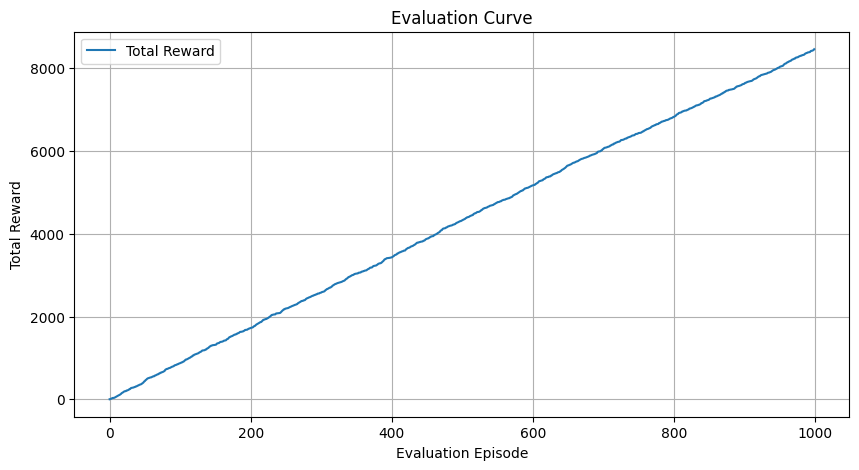

In [21]:
model = DQN.load("dqn_highway")

# Reset environment for evaluation
obs = env.reset()
episode_rewards = []
episode_lengths = []
total_rewards = []  # List to store total rewards over training episodes

num_eval_episodes = 1000
max_steps_per_episode = 100  # Maximum steps per episode

start_time = time.time()

# Perform evaluation episodes
for episode in range(num_eval_episodes):
    episode_reward = 0.0
    episode_length = 0

    # Rollout the environment until termination or max steps reached
    while episode_length < max_steps_per_episode:
        # Predict action from the model
        if isinstance(obs, tuple):
            obs = obs[0]  # Extracting the observation from the tuple
        action, _ = model.predict(obs, deterministic=True)

        # Take action in the environment
        step_result = env.step(action)

        # Unpack the step result
        if len(step_result) == 4:
            obs, reward, done, info = step_result
        elif len(step_result) == 5:
            obs, reward, done, info, _ = step_result
        else:
            raise ValueError("Unexpected number of values returned by env.step()")

        # Update episode statistics
        episode_reward += reward
        episode_length += 1

        # Check for termination
        if done:
            break

    # Append episode statistics
    episode_rewards.append(episode_reward)
    episode_lengths.append(episode_length)
    total_rewards.append(sum(episode_rewards))  # Store total reward of each episode

    # Reset environment for next episode
    obs = env.reset()

# Compute evaluation metrics
mean_reward = np.mean(episode_rewards)
mean_length = np.mean(episode_lengths)

end_time = time.time()
total_time = end_time - start_time

# Print evaluation metrics and time taken
print(f"Mean Reward: {mean_reward}")
print(f"Mean Length: {mean_length}")
print(f"Total Evaluation Time: {total_time} seconds")

# Plot learning curve
plt.figure(figsize=(10, 5))
plt.plot(range(len(total_rewards)), total_rewards, label='Total Reward')
plt.xlabel('Evaluation Episode')
plt.ylabel('Total Reward')
plt.title('Evaluation Curve')
plt.legend()
plt.grid(True)
plt.show()

## Solution 4
Environment Observation Type: OccupancyGrid \
Agent Action Type: ContinuousAction \
Algorithm Used: TD3 (Twin Delayed DDPG)

In [2]:
config2 = {
    "lanes_count": 4,  # Don't change
    "vehicles_count": 50,  # Don't change
    "duration": 40,  # Don't change
    "other_vehicles_type": "highway_env.vehicle.behavior.IDMVehicle",  # Don't change
    "initial_spacing": 2,  # Don't change
    "observation": {"type": "OccupancyGrid"},
    "action": {"type": "ContinuousAction"},
    "collision_reward": -1,
    "reward_speed_range": [20, 30],
    "simulation_frequency": 15,
    "policy_frequency": 1,
    "screen_width": 800,
    "screen_height": 600,
    "centering_position": [0.5, 0.5],
    "scaling": 5,
    "show_trajectories": False,
    "render_agent": True,
    "offscreen_rendering": False
}

# Modify environment settings as needed
config2["lanes_count"] = 4  # Don't change
config2["vehicles_count"] = 50  # Don't change
config2["duration"] = 40  # Don't change
config2["other_vehicles_type"] = "highway_env.vehicle.behavior.IDMVehicle"  # Don't change
config2["initial_spacing"] = 2  # Don't change
config2["observation"]["type"] = "OccupancyGrid"
config2["action"]["type"] = "ContinuousAction"
config2["collision_reward"] = -1
config2["reward_speed_range"] = [20, 30]
config2["simulation_frequency"] = 15
config2["policy_frequency"] = 1
config2["screen_width"] = 800  # Change as needed
config2["screen_height"] = 600  # Change as needed
config2["centering_position"] = [0.5, 0.5]  # Change as needed
config2["scaling"] = 5  # Change as needed
config2["show_trajectories"] = False  # Change as needed
config2["render_agent"] = True  # Change as needed
config2["offscreen_rendering"] = False  # Change as needed

env2 = gym.make("highway-v0", config=config2, render_mode="human")

model2 = TD3("MlpPolicy", env2, verbose=1)
model2.learn(total_timesteps=10000, log_interval=4, progress_bar=True)
model2.save("td3_highway")

print('Done Learning!')

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


c:\Users\inesd\anaconda3\envs\ml\lib\site-packages\stable_baselines3\common\buffers.py:241: UserWarning: This system does not have apparently enough memory to store the complete replay buffer 3.89GB > 0.93GB
  warnings.warn(


Output()

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 40       |
|    ep_rew_mean     | 8.63     |
| time/              |          |
|    episodes        | 4        |
|    fps             | 2        |
|    time_elapsed    | 75       |
|    total_timesteps | 160      |
| train/             |          |
|    actor_loss      | -0.251   |
|    critic_loss     | 0.152    |
|    learning_rate   | 0.001    |
|    n_updates       | 59       |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 40       |
|    ep_rew_mean     | 14.8     |
| time/              |          |
|    episodes        | 8        |
|    fps             | 1        |
|    time_elapsed    | 166      |
|    total_timesteps | 320      |
| train/             |          |
|    actor_loss      | -0.569   |
|    critic_loss     | 0.0465   |
|    learning_rate   | 0.001    |
|    n_updates       | 219      |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 40       |
|    ep_rew_mean     | 17.4     |
| time/              |          |
|    episodes        | 12       |
|    fps             | 1        |
|    time_elapsed    | 256      |
|    total_timesteps | 480      |
| train/             |          |
|    actor_loss      | -0.703   |
|    critic_loss     | 0.0786   |
|    learning_rate   | 0.001    |
|    n_updates       | 379      |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 40       |
|    ep_rew_mean     | 17.3     |
| time/              |          |
|    episodes        | 16       |
|    fps             | 1        |
|    time_elapsed    | 347      |
|    total_timesteps | 640      |
| train/             |          |
|    actor_loss      | -0.812   |
|    critic_loss     | 0.138    |
|    learning_rate   | 0.001    |
|    n_updates       | 539      |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 40       |
|    ep_rew_mean     | 17.9     |
| time/              |          |
|    episodes        | 20       |
|    fps             | 1        |
|    time_elapsed    | 439      |
|    total_timesteps | 800      |
| train/             |          |
|    actor_loss      | -0.933   |
|    critic_loss     | 0.22     |
|    learning_rate   | 0.001    |
|    n_updates       | 699      |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 40       |
|    ep_rew_mean     | 18.7     |
| time/              |          |
|    episodes        | 24       |
|    fps             | 1        |
|    time_elapsed    | 530      |
|    total_timesteps | 960      |
| train/             |          |
|    actor_loss      | -1.19    |
|    critic_loss     | 0.294    |
|    learning_rate   | 0.001    |
|    n_updates       | 859      |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 40       |
|    ep_rew_mean     | 19.2     |
| time/              |          |
|    episodes        | 28       |
|    fps             | 1        |
|    time_elapsed    | 621      |
|    total_timesteps | 1120     |
| train/             |          |
|    actor_loss      | -1.28    |
|    critic_loss     | 0.334    |
|    learning_rate   | 0.001    |
|    n_updates       | 1019     |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 40       |
|    ep_rew_mean     | 18.7     |
| time/              |          |
|    episodes        | 32       |
|    fps             | 1        |
|    time_elapsed    | 712      |
|    total_timesteps | 1280     |
| train/             |          |
|    actor_loss      | -1.58    |
|    critic_loss     | 0.422    |
|    learning_rate   | 0.001    |
|    n_updates       | 1179     |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 40       |
|    ep_rew_mean     | 19       |
| time/              |          |
|    episodes        | 36       |
|    fps             | 1        |
|    time_elapsed    | 804      |
|    total_timesteps | 1440     |
| train/             |          |
|    actor_loss      | -1.67    |
|    critic_loss     | 0.272    |
|    learning_rate   | 0.001    |
|    n_updates       | 1339     |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 40       |
|    ep_rew_mean     | 18.9     |
| time/              |          |
|    episodes        | 40       |
|    fps             | 1        |
|    time_elapsed    | 896      |
|    total_timesteps | 1600     |
| train/             |          |
|    actor_loss      | -1.85    |
|    critic_loss     | 0.297    |
|    learning_rate   | 0.001    |
|    n_updates       | 1499     |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 40       |
|    ep_rew_mean     | 19.4     |
| time/              |          |
|    episodes        | 44       |
|    fps             | 1        |
|    time_elapsed    | 993      |
|    total_timesteps | 1760     |
| train/             |          |
|    actor_loss      | -2.03    |
|    critic_loss     | 0.422    |
|    learning_rate   | 0.001    |
|    n_updates       | 1659     |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 40       |
|    ep_rew_mean     | 19.5     |
| time/              |          |
|    episodes        | 48       |
|    fps             | 1        |
|    time_elapsed    | 1084     |
|    total_timesteps | 1920     |
| train/             |          |
|    actor_loss      | -2.19    |
|    critic_loss     | 0.487    |
|    learning_rate   | 0.001    |
|    n_updates       | 1819     |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 40       |
|    ep_rew_mean     | 19.4     |
| time/              |          |
|    episodes        | 52       |
|    fps             | 1        |
|    time_elapsed    | 1176     |
|    total_timesteps | 2080     |
| train/             |          |
|    actor_loss      | -2.33    |
|    critic_loss     | 0.534    |
|    learning_rate   | 0.001    |
|    n_updates       | 1979     |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 40       |
|    ep_rew_mean     | 19.3     |
| time/              |          |
|    episodes        | 56       |
|    fps             | 1        |
|    time_elapsed    | 1268     |
|    total_timesteps | 2240     |
| train/             |          |
|    actor_loss      | -2.47    |
|    critic_loss     | 0.5      |
|    learning_rate   | 0.001    |
|    n_updates       | 2139     |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 40       |
|    ep_rew_mean     | 19.5     |
| time/              |          |
|    episodes        | 60       |
|    fps             | 1        |
|    time_elapsed    | 1359     |
|    total_timesteps | 2400     |
| train/             |          |
|    actor_loss      | -2.55    |
|    critic_loss     | 0.511    |
|    learning_rate   | 0.001    |
|    n_updates       | 2299     |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 40       |
|    ep_rew_mean     | 19.4     |
| time/              |          |
|    episodes        | 64       |
|    fps             | 1        |
|    time_elapsed    | 1452     |
|    total_timesteps | 2560     |
| train/             |          |
|    actor_loss      | -2.78    |
|    critic_loss     | 0.551    |
|    learning_rate   | 0.001    |
|    n_updates       | 2459     |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 40       |
|    ep_rew_mean     | 19.6     |
| time/              |          |
|    episodes        | 68       |
|    fps             | 1        |
|    time_elapsed    | 1544     |
|    total_timesteps | 2720     |
| train/             |          |
|    actor_loss      | -2.89    |
|    critic_loss     | 0.466    |
|    learning_rate   | 0.001    |
|    n_updates       | 2619     |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 40       |
|    ep_rew_mean     | 20       |
| time/              |          |
|    episodes        | 72       |
|    fps             | 1        |
|    time_elapsed    | 1636     |
|    total_timesteps | 2880     |
| train/             |          |
|    actor_loss      | -3.07    |
|    critic_loss     | 0.44     |
|    learning_rate   | 0.001    |
|    n_updates       | 2779     |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 40       |
|    ep_rew_mean     | 20.3     |
| time/              |          |
|    episodes        | 76       |
|    fps             | 1        |
|    time_elapsed    | 1727     |
|    total_timesteps | 3040     |
| train/             |          |
|    actor_loss      | -3.33    |
|    critic_loss     | 0.601    |
|    learning_rate   | 0.001    |
|    n_updates       | 2939     |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 40       |
|    ep_rew_mean     | 20.1     |
| time/              |          |
|    episodes        | 80       |
|    fps             | 1        |
|    time_elapsed    | 1818     |
|    total_timesteps | 3200     |
| train/             |          |
|    actor_loss      | -3.06    |
|    critic_loss     | 0.642    |
|    learning_rate   | 0.001    |
|    n_updates       | 3099     |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 40       |
|    ep_rew_mean     | 19.4     |
| time/              |          |
|    episodes        | 84       |
|    fps             | 1        |
|    time_elapsed    | 1910     |
|    total_timesteps | 3360     |
| train/             |          |
|    actor_loss      | -2.99    |
|    critic_loss     | 0.544    |
|    learning_rate   | 0.001    |
|    n_updates       | 3259     |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 40       |
|    ep_rew_mean     | 18.8     |
| time/              |          |
|    episodes        | 88       |
|    fps             | 1        |
|    time_elapsed    | 2001     |
|    total_timesteps | 3520     |
| train/             |          |
|    actor_loss      | -3.2     |
|    critic_loss     | 0.598    |
|    learning_rate   | 0.001    |
|    n_updates       | 3419     |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 40       |
|    ep_rew_mean     | 18.2     |
| time/              |          |
|    episodes        | 92       |
|    fps             | 1        |
|    time_elapsed    | 2093     |
|    total_timesteps | 3680     |
| train/             |          |
|    actor_loss      | -3.19    |
|    critic_loss     | 0.873    |
|    learning_rate   | 0.001    |
|    n_updates       | 3579     |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 40       |
|    ep_rew_mean     | 17.8     |
| time/              |          |
|    episodes        | 96       |
|    fps             | 1        |
|    time_elapsed    | 2184     |
|    total_timesteps | 3840     |
| train/             |          |
|    actor_loss      | -3.14    |
|    critic_loss     | 0.984    |
|    learning_rate   | 0.001    |
|    n_updates       | 3739     |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 40       |
|    ep_rew_mean     | 17.4     |
| time/              |          |
|    episodes        | 100      |
|    fps             | 1        |
|    time_elapsed    | 2275     |
|    total_timesteps | 4000     |
| train/             |          |
|    actor_loss      | -3.24    |
|    critic_loss     | 0.973    |
|    learning_rate   | 0.001    |
|    n_updates       | 3899     |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 40       |
|    ep_rew_mean     | 17.4     |
| time/              |          |
|    episodes        | 104      |
|    fps             | 1        |
|    time_elapsed    | 2367     |
|    total_timesteps | 4160     |
| train/             |          |
|    actor_loss      | -3.39    |
|    critic_loss     | 1.22     |
|    learning_rate   | 0.001    |
|    n_updates       | 4059     |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 40       |
|    ep_rew_mean     | 16.8     |
| time/              |          |
|    episodes        | 108      |
|    fps             | 1        |
|    time_elapsed    | 2458     |
|    total_timesteps | 4320     |
| train/             |          |
|    actor_loss      | -3.28    |
|    critic_loss     | 1.05     |
|    learning_rate   | 0.001    |
|    n_updates       | 4219     |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 40       |
|    ep_rew_mean     | 16.2     |
| time/              |          |
|    episodes        | 112      |
|    fps             | 1        |
|    time_elapsed    | 2550     |
|    total_timesteps | 4480     |
| train/             |          |
|    actor_loss      | -3.28    |
|    critic_loss     | 1.25     |
|    learning_rate   | 0.001    |
|    n_updates       | 4379     |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 40       |
|    ep_rew_mean     | 15.8     |
| time/              |          |
|    episodes        | 116      |
|    fps             | 1        |
|    time_elapsed    | 2641     |
|    total_timesteps | 4640     |
| train/             |          |
|    actor_loss      | -3.37    |
|    critic_loss     | 1.2      |
|    learning_rate   | 0.001    |
|    n_updates       | 4539     |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 40       |
|    ep_rew_mean     | 15.3     |
| time/              |          |
|    episodes        | 120      |
|    fps             | 1        |
|    time_elapsed    | 2733     |
|    total_timesteps | 4800     |
| train/             |          |
|    actor_loss      | -3.27    |
|    critic_loss     | 1.16     |
|    learning_rate   | 0.001    |
|    n_updates       | 4699     |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 40       |
|    ep_rew_mean     | 14.6     |
| time/              |          |
|    episodes        | 124      |
|    fps             | 1        |
|    time_elapsed    | 2824     |
|    total_timesteps | 4960     |
| train/             |          |
|    actor_loss      | -3.36    |
|    critic_loss     | 1.36     |
|    learning_rate   | 0.001    |
|    n_updates       | 4859     |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 40       |
|    ep_rew_mean     | 14       |
| time/              |          |
|    episodes        | 128      |
|    fps             | 1        |
|    time_elapsed    | 2916     |
|    total_timesteps | 5120     |
| train/             |          |
|    actor_loss      | -3.42    |
|    critic_loss     | 1.38     |
|    learning_rate   | 0.001    |
|    n_updates       | 5019     |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 40       |
|    ep_rew_mean     | 13.6     |
| time/              |          |
|    episodes        | 132      |
|    fps             | 1        |
|    time_elapsed    | 3008     |
|    total_timesteps | 5280     |
| train/             |          |
|    actor_loss      | -3.3     |
|    critic_loss     | 1.32     |
|    learning_rate   | 0.001    |
|    n_updates       | 5179     |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 40       |
|    ep_rew_mean     | 13.1     |
| time/              |          |
|    episodes        | 136      |
|    fps             | 1        |
|    time_elapsed    | 3100     |
|    total_timesteps | 5440     |
| train/             |          |
|    actor_loss      | -3.11    |
|    critic_loss     | 1.52     |
|    learning_rate   | 0.001    |
|    n_updates       | 5339     |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 40       |
|    ep_rew_mean     | 12.7     |
| time/              |          |
|    episodes        | 140      |
|    fps             | 1        |
|    time_elapsed    | 3192     |
|    total_timesteps | 5600     |
| train/             |          |
|    actor_loss      | -3.28    |
|    critic_loss     | 1.17     |
|    learning_rate   | 0.001    |
|    n_updates       | 5499     |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 40       |
|    ep_rew_mean     | 11.9     |
| time/              |          |
|    episodes        | 144      |
|    fps             | 1        |
|    time_elapsed    | 3283     |
|    total_timesteps | 5760     |
| train/             |          |
|    actor_loss      | -3.4     |
|    critic_loss     | 1.33     |
|    learning_rate   | 0.001    |
|    n_updates       | 5659     |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 40       |
|    ep_rew_mean     | 11.3     |
| time/              |          |
|    episodes        | 148      |
|    fps             | 1        |
|    time_elapsed    | 3375     |
|    total_timesteps | 5920     |
| train/             |          |
|    actor_loss      | -3.32    |
|    critic_loss     | 1.31     |
|    learning_rate   | 0.001    |
|    n_updates       | 5819     |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 40       |
|    ep_rew_mean     | 11       |
| time/              |          |
|    episodes        | 152      |
|    fps             | 1        |
|    time_elapsed    | 3466     |
|    total_timesteps | 6080     |
| train/             |          |
|    actor_loss      | -3.49    |
|    critic_loss     | 1.19     |
|    learning_rate   | 0.001    |
|    n_updates       | 5979     |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 40       |
|    ep_rew_mean     | 10.5     |
| time/              |          |
|    episodes        | 156      |
|    fps             | 1        |
|    time_elapsed    | 3558     |
|    total_timesteps | 6240     |
| train/             |          |
|    actor_loss      | -3.51    |
|    critic_loss     | 1.14     |
|    learning_rate   | 0.001    |
|    n_updates       | 6139     |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 40       |
|    ep_rew_mean     | 9.92     |
| time/              |          |
|    episodes        | 160      |
|    fps             | 1        |
|    time_elapsed    | 3650     |
|    total_timesteps | 6400     |
| train/             |          |
|    actor_loss      | -3.57    |
|    critic_loss     | 1.27     |
|    learning_rate   | 0.001    |
|    n_updates       | 6299     |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 40       |
|    ep_rew_mean     | 9.54     |
| time/              |          |
|    episodes        | 164      |
|    fps             | 1        |
|    time_elapsed    | 3741     |
|    total_timesteps | 6560     |
| train/             |          |
|    actor_loss      | -3.39    |
|    critic_loss     | 1.32     |
|    learning_rate   | 0.001    |
|    n_updates       | 6459     |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 40       |
|    ep_rew_mean     | 8.86     |
| time/              |          |
|    episodes        | 168      |
|    fps             | 1        |
|    time_elapsed    | 3832     |
|    total_timesteps | 6720     |
| train/             |          |
|    actor_loss      | -3.54    |
|    critic_loss     | 1        |
|    learning_rate   | 0.001    |
|    n_updates       | 6619     |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 40       |
|    ep_rew_mean     | 8.04     |
| time/              |          |
|    episodes        | 172      |
|    fps             | 1        |
|    time_elapsed    | 3924     |
|    total_timesteps | 6880     |
| train/             |          |
|    actor_loss      | -3.57    |
|    critic_loss     | 1.21     |
|    learning_rate   | 0.001    |
|    n_updates       | 6779     |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 40       |
|    ep_rew_mean     | 7.27     |
| time/              |          |
|    episodes        | 176      |
|    fps             | 1        |
|    time_elapsed    | 4015     |
|    total_timesteps | 7040     |
| train/             |          |
|    actor_loss      | -3.57    |
|    critic_loss     | 1.2      |
|    learning_rate   | 0.001    |
|    n_updates       | 6939     |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 40       |
|    ep_rew_mean     | 6.87     |
| time/              |          |
|    episodes        | 180      |
|    fps             | 1        |
|    time_elapsed    | 4108     |
|    total_timesteps | 7200     |
| train/             |          |
|    actor_loss      | -3.52    |
|    critic_loss     | 1.18     |
|    learning_rate   | 0.001    |
|    n_updates       | 7099     |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 40       |
|    ep_rew_mean     | 6.92     |
| time/              |          |
|    episodes        | 184      |
|    fps             | 1        |
|    time_elapsed    | 4200     |
|    total_timesteps | 7360     |
| train/             |          |
|    actor_loss      | -3.54    |
|    critic_loss     | 1.16     |
|    learning_rate   | 0.001    |
|    n_updates       | 7259     |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 40       |
|    ep_rew_mean     | 6.91     |
| time/              |          |
|    episodes        | 188      |
|    fps             | 1        |
|    time_elapsed    | 4292     |
|    total_timesteps | 7520     |
| train/             |          |
|    actor_loss      | -3.64    |
|    critic_loss     | 1.29     |
|    learning_rate   | 0.001    |
|    n_updates       | 7419     |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 40       |
|    ep_rew_mean     | 6.92     |
| time/              |          |
|    episodes        | 192      |
|    fps             | 1        |
|    time_elapsed    | 4384     |
|    total_timesteps | 7680     |
| train/             |          |
|    actor_loss      | -3.76    |
|    critic_loss     | 1.14     |
|    learning_rate   | 0.001    |
|    n_updates       | 7579     |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 40       |
|    ep_rew_mean     | 6.87     |
| time/              |          |
|    episodes        | 196      |
|    fps             | 1        |
|    time_elapsed    | 4476     |
|    total_timesteps | 7840     |
| train/             |          |
|    actor_loss      | -3.71    |
|    critic_loss     | 1.29     |
|    learning_rate   | 0.001    |
|    n_updates       | 7739     |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 40       |
|    ep_rew_mean     | 6.82     |
| time/              |          |
|    episodes        | 200      |
|    fps             | 1        |
|    time_elapsed    | 4568     |
|    total_timesteps | 8000     |
| train/             |          |
|    actor_loss      | -3.74    |
|    critic_loss     | 0.988    |
|    learning_rate   | 0.001    |
|    n_updates       | 7899     |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 40       |
|    ep_rew_mean     | 6.75     |
| time/              |          |
|    episodes        | 204      |
|    fps             | 1        |
|    time_elapsed    | 4661     |
|    total_timesteps | 8160     |
| train/             |          |
|    actor_loss      | -3.78    |
|    critic_loss     | 0.923    |
|    learning_rate   | 0.001    |
|    n_updates       | 8059     |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 40       |
|    ep_rew_mean     | 6.71     |
| time/              |          |
|    episodes        | 208      |
|    fps             | 1        |
|    time_elapsed    | 4753     |
|    total_timesteps | 8320     |
| train/             |          |
|    actor_loss      | -3.79    |
|    critic_loss     | 1.57     |
|    learning_rate   | 0.001    |
|    n_updates       | 8219     |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 40       |
|    ep_rew_mean     | 6.66     |
| time/              |          |
|    episodes        | 212      |
|    fps             | 1        |
|    time_elapsed    | 4846     |
|    total_timesteps | 8480     |
| train/             |          |
|    actor_loss      | -3.91    |
|    critic_loss     | 1.01     |
|    learning_rate   | 0.001    |
|    n_updates       | 8379     |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 40       |
|    ep_rew_mean     | 6.57     |
| time/              |          |
|    episodes        | 216      |
|    fps             | 1        |
|    time_elapsed    | 4938     |
|    total_timesteps | 8640     |
| train/             |          |
|    actor_loss      | -3.98    |
|    critic_loss     | 1.06     |
|    learning_rate   | 0.001    |
|    n_updates       | 8539     |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 40       |
|    ep_rew_mean     | 6.52     |
| time/              |          |
|    episodes        | 220      |
|    fps             | 1        |
|    time_elapsed    | 5033     |
|    total_timesteps | 8800     |
| train/             |          |
|    actor_loss      | -4       |
|    critic_loss     | 1.27     |
|    learning_rate   | 0.001    |
|    n_updates       | 8699     |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 40       |
|    ep_rew_mean     | 6.52     |
| time/              |          |
|    episodes        | 224      |
|    fps             | 1        |
|    time_elapsed    | 5136     |
|    total_timesteps | 8960     |
| train/             |          |
|    actor_loss      | -3.85    |
|    critic_loss     | 1.07     |
|    learning_rate   | 0.001    |
|    n_updates       | 8859     |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 40       |
|    ep_rew_mean     | 6.56     |
| time/              |          |
|    episodes        | 228      |
|    fps             | 1        |
|    time_elapsed    | 5239     |
|    total_timesteps | 9120     |
| train/             |          |
|    actor_loss      | -3.92    |
|    critic_loss     | 1.48     |
|    learning_rate   | 0.001    |
|    n_updates       | 9019     |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 40       |
|    ep_rew_mean     | 6.57     |
| time/              |          |
|    episodes        | 232      |
|    fps             | 1        |
|    time_elapsed    | 5353     |
|    total_timesteps | 9280     |
| train/             |          |
|    actor_loss      | -4       |
|    critic_loss     | 1.06     |
|    learning_rate   | 0.001    |
|    n_updates       | 9179     |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 40       |
|    ep_rew_mean     | 6.54     |
| time/              |          |
|    episodes        | 236      |
|    fps             | 1        |
|    time_elapsed    | 5469     |
|    total_timesteps | 9440     |
| train/             |          |
|    actor_loss      | -4.14    |
|    critic_loss     | 1.19     |
|    learning_rate   | 0.001    |
|    n_updates       | 9339     |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 40       |
|    ep_rew_mean     | 6.48     |
| time/              |          |
|    episodes        | 240      |
|    fps             | 1        |
|    time_elapsed    | 5562     |
|    total_timesteps | 9600     |
| train/             |          |
|    actor_loss      | -3.98    |
|    critic_loss     | 0.939    |
|    learning_rate   | 0.001    |
|    n_updates       | 9499     |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 40       |
|    ep_rew_mean     | 6.48     |
| time/              |          |
|    episodes        | 244      |
|    fps             | 1        |
|    time_elapsed    | 5657     |
|    total_timesteps | 9760     |
| train/             |          |
|    actor_loss      | -4.14    |
|    critic_loss     | 1.1      |
|    learning_rate   | 0.001    |
|    n_updates       | 9659     |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 40       |
|    ep_rew_mean     | 6.58     |
| time/              |          |
|    episodes        | 248      |
|    fps             | 1        |
|    time_elapsed    | 5748     |
|    total_timesteps | 9920     |
| train/             |          |
|    actor_loss      | -4.13    |
|    critic_loss     | 1.21     |
|    learning_rate   | 0.001    |
|    n_updates       | 9819     |
---------------------------------


Done Learning!


c:\Users\inesd\anaconda3\envs\ml\lib\site-packages\stable_baselines3\common\buffers.py:241: UserWarning: This system does not have apparently enough memory to store the complete replay buffer 3.89GB > 1.16GB
  warnings.warn(


Mean Reward: 12.970959293560284
Mean Length: 100.0
Total Evaluation Time: 44932.38121151924 seconds


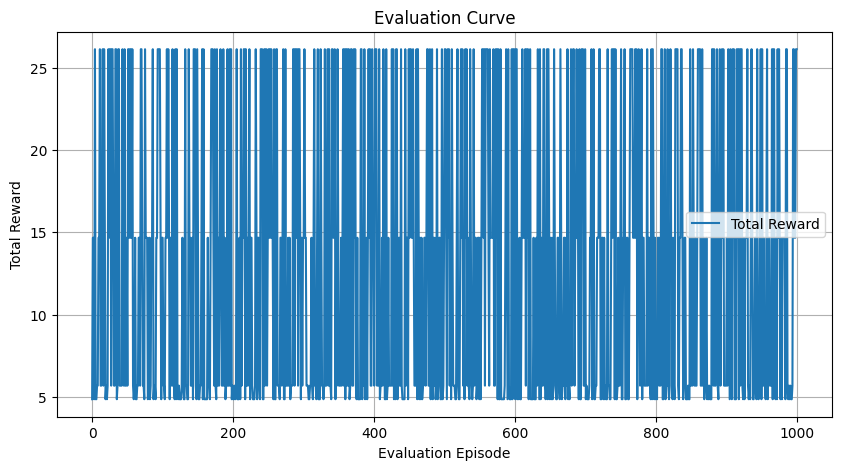

In [3]:
# Load the trained TD3 model
model2 = TD3.load("td3_highway")

# Reset environment for evaluation
obs = env2.reset()
episode_rewards = []
episode_lengths = []
total_rewards = []

num_eval_episodes = 1000
max_steps_per_episode = 100  # Maximum steps per episode

start_time = time.time()

# Perform evaluation episodes
for episode in range(num_eval_episodes):
    episode_reward = 0.0
    episode_length = 0

    # Rollout the environment until termination or max steps reached
    while episode_length < max_steps_per_episode:
        # Predict action from the model
        if isinstance(obs, tuple):
            obs = obs[0]  # Extracting the observation from the tuple
        action, _ = model2.predict(obs, deterministic=True)

        # Take action in the environment
        step_result = env2.step(action)

        # Unpack the step result
        if len(step_result) == 4:
            obs, reward, done, info = step_result
        elif len(step_result) == 5:
            obs, reward, done, info, _ = step_result
        else:
            raise ValueError("Unexpected number of values returned by env.step()")

        # Update episode statistics
        episode_reward += reward
        episode_length += 1

        # Check for termination
        if done:
            break

    # Append episode statistics
    episode_rewards.append(episode_reward)
    episode_lengths.append(episode_length)
    total_rewards.append(episode_reward)  # Store total reward of each episode

    # Reset environment for next episode
    obs = env2.reset()

# Compute evaluation metrics
mean_reward = np.mean(episode_rewards)
mean_length = np.mean(episode_lengths)

end_time = time.time()
total_time = end_time - start_time

# Print evaluation metrics and time taken
print(f"Mean Reward: {mean_reward}")
print(f"Mean Length: {mean_length}")
print(f"Total Evaluation Time: {total_time} seconds")

# Plot learning curve
plt.figure(figsize=(10, 5))
plt.plot(range(len(total_rewards)), total_rewards, label='Total Reward')
plt.xlabel('Evaluation Episode')
plt.ylabel('Total Reward')
plt.title('Evaluation Curve')
plt.legend()
plt.grid(True)
plt.show()
